# (MultiFiT) French Sentiment Classifier on French Amazon Customer Reviews
### (architecture 4 QRNN with 1550 hidden parameters by layer, SentencePiece tokenizer and hyperparameters from the MultiFiT method)

- Author: [Pierre Guillou](https://www.linkedin.com/in/pierreguillou)
- Date: **edition of October 20, 2019** (initial publication on September 2019)
- Post in medium: [link](https://medium.com/@pierre_guillou/nlp-fastai-french-language-model-d0e2a9e12cab)
- Ref: [Fastai v1](https://docs.fast.ai/) (Deep Learning library on PyTorch)

## Warning (20/10/2019)

**This notebook is a modified version of the v1 published in September 2019.** Indeed (thanks to [David Vieira](https://medium.com/@davidhsv/ol%C3%A1-pierre-tudo-bom-2bc8ae36dc14)), we noticed that the fine-tuning of the LM and classifier did not use the SentencePiece model and vocab trained for the General Portuguese Language Model ([lm3-portuguese.ipynb](https://github.com/piegu/language-models/blob/master/lm3-portuguese.ipynb)). This was the case of the General French Language Model ([lm3-french.ipynb](https://github.com/piegu/language-models/blob/master/lm3-french.ipynb)), too.

For example, the code used to create the fine-tuned French forward LM was : 

```
data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, 
                            processor=[OpenFileProcessor(), SPProcessor(max_vocab_sz=15000)])
          .split_by_rand_pct(0.1, seed=42)
          .label_for_lm()           
          .databunch(bs=bs, num_workers=1))
```

It has been corrected by using the [SPProcessor.load()](https://github.com/fastai/fastai/blob/master/fastai/text/data.py#L481) function:

```
data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
          .split_by_rand_pct(0.1, seed=42)
          .label_for_lm()           
          .databunch(bs=bs, num_workers=1))
```
    
Therefore, we retrained the fine-tuned French forward LM and the classifier on Amazon Reviews dataset (see the Results paragraph to get all results).

- **(fine-tuned) Language Model**   
    - forward : (accuracy) **42.03%** instead of 37.57% | (perplexity) 17.87 instead of 24.62
    - backward: (accuracy) **46.82%** instead of 43.25% | (perplexity) 18.05 instead of 24.90 
 
- **(fine-tuned) Text Classifier**
    - **Accuracy** (ensemble) **95.74%** instead of 95.92%
    - **f1 score** (ensemble): **0.9758** instead of 0.9636 
   

## Information

### Overview

According to this new article "[MultiFiT: Efficient Multi-lingual Language Model Fine-tuning](https://arxiv.org/abs/1909.04761)" (September 10, 2019), the QRNN architecture and the SentencePiece tokenizer give better results than AWD-LSTM and the spaCy tokenizer respectively. 

Therefore, they have been used in this notebook to **fine-tune a French bidirectional Language Model** by Transfer Learning of a French bidirectional Language Model (with the QRNN architecture and the SentencePiece tokenizer, too) trained on a Wikipedia corpus of 100 millions tokens ([lm2-french.ipynb](https://github.com/piegu/language-models/blob/master/lm2-french.ipynb)). 

This French bidirectional Language Model has been **fine-tuned on "[French Amazon Customer Reviews](https://s3.amazonaws.com/amazon-reviews-pds/readme.html)"** and **its encoder part has been transfered to a sentiment classifier which has been finally trained on this amazon corpus**.

This process **LM General --> LM fine-tuned --> Classifier fine-tuned** is called [ULMFiT](http://nlp.fast.ai/category/classification.html).

### Hyperparameters values

The following hyperparameters values given at the end of the MultiFiT article have been used:
- Language Model
    - (batch size) bs = 50
    - (QRNN) 3 QRNN (default: 3) with 1152 hidden parameters each one (default: 1152) (note: it would have been better to increae to 4 QRNN with 1550 hidden parameters like described in the article)
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 0
    - (weight decay) wd = 0.01
    - (number of training epochs) 20 epochs
    

- Sentiment Classifier
    - (batch size) bs = 18
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 0.5
    - (weight decay) wd = 0.01
    - (number of training epochs) 10 epochs
    - (loss) FlattenedLoss of weighted CrossEntropyLoss

## Results

Our Bidirectional French LM ([lm3-french.ipynb](https://github.com/piegu/language-models/blob/master/lm3-french.ipynb)) and Sentiment Classifier with a MultiFiT configuration (4 QRNN architecture, 1550 hidden parameters and using the SentencePiecce tokenizer) ([lm3-french-classifier-amazon.ipynb](https://github.com/piegu/language-models/blob/master/lm3-french-classifier-amazon.ipynb)) have better results (accuracy, perplexity and f1) than the 2 others Bidirectional French LM ([lm-french.ipynb](https://github.com/piegu/language-models/blob/master/lm-french.ipynb) and [lm2-french.ipynb](https://github.com/piegu/language-models/blob/master/lm2-french.ipynb)) we have trained before.

This improvement comes from:
- the deeper complexity of our last Bidirectional French LMs and Sentiment Classifier that use the MultiFiT configuration (4 QRNN architecture with 1550 hidden parameters): 4 layers instead of 3 and each hidden layer has more parameters.
- the use of the SentencePiecce tokenizer (even with only a vocab of 15 000 tokens instead of 60 000 with the spaCy tokenizer)

**We can conclude that this Bidirectional French LM model using the MultiFiT configuration is a good model to perform text classification but with only 46 millions of parameters, it is far from being a LM that can gan compete with [GPT-2](https://openai.com/blog/better-language-models/) or [BERT](https://arxiv.org/abs/1810.04805) in NLP tasks like text generation.**

- **About the data**: the dataset "French Amazon Customer Reviews", even after pre-processing (deleting empty reviews, neutral ones, etc.), is unbalanced. Therefore, we used a weighted loss function (FlattenedLoss of weighted CrossEntropyLoss).
    - initial number of reviews: 253 961
    - number of reviews after pre-processing: 221 456
        - neg: 25106 (11.34%)
        - pos: 196350 (88.66%)


- **(fine-tuned) Language Model**   
    - forward : (accuracy) 42.03% | 17.87 (perplexity)
    - backward: (accuracy) 46.82% | 18.05 (perplexity) 
    

- **(fine-tuned) Sentiment Classifier**

    - **Accuracy**
        - forward : (global) 95.53% | (neg) 87.56% | (pos) 96.51%
        - backward: (global) 94.79% | **(neg) 91.83%** | (pos) 95.15%
        - ensemble: **(global) 95.74%** | (neg) 90.63% | **(pos) 96.37%**

    - **f1 score**
        - forward: 0.9718
        - backward: 0.9718
        - ensemble: **0.9758**

(neg = negative reviews | pos = positive reviews)

### To be improved

The lost function FlattenedLoss of LabelSmoothingCrossEntropy should be tested as it is used in the MultiFiT method (see the notebook [lm3-portuguese-classifier-TCU-jurisprudencia.ipynb](https://github.com/piegu/language-models/blob/master/lm3-portuguese-classifier-TCU-jurisprudencia.ipynb) to get the code).

## Initialisation

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [2]:
from sklearn.metrics import f1_score

@np_func
def f1(inp,targ): return f1_score(targ, np.argmax(inp, axis=-1))

In [3]:
!python -m fastai.utils.show_install



```text
=== Software === 
python        : 3.7.4
fastai        : 1.0.58
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 410.104
torch cuda    : 10.0.130 / is available
torch cudnn   : 7602 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 16130MB | Tesla V100-SXM2-16GB

=== Environment === 
platform      : Linux-4.9.0-9-amd64-x86_64-with-debian-9.9
distro        : #1 SMP Debian 4.9.168-1+deb9u5 (2019-08-11)
conda env     : base
python        : /opt/anaconda3/bin/python
sys.path      : /home/jupyter/tutorials/fastai/course-nlp
/opt/anaconda3/lib/python37.zip
/opt/anaconda3/lib/python3.7
/opt/anaconda3/lib/python3.7/lib-dynload
/opt/anaconda3/lib/python3.7/site-packages
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:


In [4]:
# bs=48
# bs=24
bs=50

In [5]:
torch.cuda.set_device(0)

In [6]:
data_path = Config.data_path()

This will create a `{lang}wiki` folder, containing a `{lang}wiki` text file with the wikipedia contents. (For other languages, replace `{lang}` with the appropriate code from the [list of wikipedias](https://meta.wikimedia.org/wiki/List_of_Wikipedias).)

In [7]:
lang = 'fr'

In [8]:
name = f'{lang}wiki'
path = data_path/name
path.mkdir(exist_ok=True, parents=True)

lm_fns3 = [f'{lang}_wt_sp15_multifit', f'{lang}_wt_vocab_sp15_multifit']
lm_fns3_bwd = [f'{lang}_wt_sp15_multifit_bwd', f'{lang}_wt_vocab_sp15_multifit_bwd']

## Data

- [French Amazon Customer Reviews](https://s3.amazonaws.com/amazon-reviews-pds/readme.html)
- [Guide on how to download the French Amazon Customer Reviews](https://forums.fast.ai/t/ulmfit-french/29379/36)
- File: amazon_reviews_multilingual_FR_v1_00.tsv.gz

In [8]:
name = 'amazon_reviews_fr'
path_data = data_path/name
path_data.ls()

[PosixPath('/home/jupyter/.fastai/data/amazon_reviews_fr/amazon_reviews_multilingual_FR_v1_00.tsv'),
 PosixPath('/home/jupyter/.fastai/data/amazon_reviews_fr/amazon_reviews_filtered_fr.csv'),
 PosixPath('/home/jupyter/.fastai/data/amazon_reviews_fr/amazon_reviews_fr.csv')]

### Run this code the first time

#### Get reviews neg and pos

In [9]:
# to solve display error of pandas dataframe
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [10]:
fields = ['review_id', 'review_body', 'star_rating']
df = pd.read_csv(path_data/'amazon_reviews_multilingual_FR_v1_00.tsv', delimiter='\t',encoding='utf-8', usecols=fields)
df = df[fields]
df.loc[pd.isna(df.review_body),'review_body']='NA'
df.head()

,review_id,review_body,star_rating
0,R32VYUWDIB5LKE,je conseille fortement ce bouquin à ceux qui s...,5
1,R3CCMP4EV6HAVL,"ce magnifique est livre , les personnages sont...",5
2,R14NAE6UGTVTA2,Je dirais qu'il a un défaut :<br />On ne peut ...,3
3,R2E7QEWSC6EWFA,Je l'ai depuis quelques jours et j'en suis trè...,4
4,R26E6I47GQRYKR,"je m'attendait à un bon film, car j'aime beauc...",2


In [19]:
# columns names
reviews = "review_body"
idx = "review_id"
rating = "star_rating"
label = "label"

# keep not null reviews
df2 = df.copy()

In [20]:
# number of reviews
print(f'(orginal csv) number of all reviews: {len(df)}')

df2 = df.copy()

# keep not null reviews
empty = (df2[reviews].isnull()).sum()
df2 = df2[df2[reviews].notnull()]
if empty != 0:
    print(f'{empty} empty reviews were deleted')
else:
    print('there is no empty review.')

# check that there is no twice the same review
# keep the first of unique review_id reviews
same = len(df2) - len(df2[idx].unique())
if same != 0:
    df2.drop_duplicates(subset=[idx], inplace=True)
    print(f'from the {same} identical reviews ids, only the first one has been kept.')
else:
    print('there is no identical review id.')

# categorify reviews in 2 classes neg, pos in the label column (rating != 3)
neutral = len(df2[df2[rating] == 3])
df2 = df2[df2[rating] != 3]
df2[label] = 'neg'
df2.loc[df2[rating] > 3, label] = 'pos'
print(f'{neutral} neutral reviews (rating = 3) were deleted')

# number of reviews neg or pos
num_neg = len(df2[df2[label] == 'neg'])
num_pos = len(df2[df2[label] == 'pos'])
num_neg_pos = len(df2)
pc_neg = round((num_neg/num_neg_pos)*100,2)
pc_pos = round((num_pos/num_neg_pos)*100,2)
print(f'\nnumber of neg reviews (rating = 1 or 2): {num_neg} ({pc_neg}%)')
print(f'number of pos reviews (rating = 4 or 5): {num_pos} ({pc_pos}%)')
print(f'\n(final) number of all reviews neg and pos: {num_neg_pos}')  

# convert HTML caracters to normal letters
df2[reviews] = df2[reviews].apply(convert)

df2[[reviews, rating]].head(10)

(orginal csv) number of all reviews: 253961
there is no empty review.
there is no identical review id.
23277 neutral reviews (rating = 3) were deleted

number of neg reviews (rating = 1 or 2): 25637 (11.11%)
number of pos reviews (rating = 4 or 5): 205047 (88.89%)

(final) number of all reviews neg and pos: 230684


,review_body,star_rating
0,je conseille fortement ce bouquin à ceux qui s...,5
1,"ce magnifique est livre , les personnages sont...",5
3,Je l'ai depuis quelques jours et j'en suis trè...,4
4,"je m'attendait à un bon film, car j'aime beauc...",2
5,Ne disait pas sur l'annonce que c'était un 10'...,2
6,"du bon bowie,très bon meme parfois.esperons qu...",5
7,très bon film beaucoup d'action l'image est le...,5
8,Un sujet délicat mais parfaitement traité avec...,5
9,Un coffret d'un duo culte que les DVD nous per...,5
10,"Un grand classique dans ce genre de films, mai...",5


#### Delete the non French reviews

**FastText**

- library source: https://github.com/facebookresearch/fastText/tree/master/python
- Blog post about using fasttext for language detection: https://amitness.com/2019/07/identify-text-language-python/
- "New release of python module" (june 2019): https://fasttext.cc/blog/2019/06/25/blog-post.html

In [24]:
import fasttext
import urllib.request
from converter import *

In [25]:
# Download the file from url and save it locally under file_name
# source: https://fasttext.cc/docs/en/language-identification.html

path_ft = Path.cwd() # /home/jupyter/tutorials/fastai/course-nlp
url = 'https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin'
file_name = 'lid.176.bin'
url_file = path_ft/file_name
urllib.request.urlretrieve(url, url_file)

(PosixPath('/home/jupyter/tutorials/fastai/course-nlp/lid.176.bin'),
 <http.client.HTTPMessage at 0x7f2f633f6490>)

In [26]:
# get the model trained on 176 languages
model = fasttext.load_model(file_name)

In [27]:
# test
sentences = ['Il fait très beau']
predictions = model.predict(sentences)
print(predictions[0][0][0].replace('__label__','') == 'fr')
print(predictions)

True
([['__label__fr']], array([[1.000027]]))


In [28]:
%%time
list_idx = []
for idx, row in df2.iterrows():
    try:
        string = str(row[reviews]).replace('\r',' ').replace('\n','').replace('<br />', ' ').lower()
        predictions = model.predict(string)
        language = predictions[0][0].replace('__label__','')
    except:
        language = "error"
    if not (language == 'fr'):
        list_idx.append(idx)
        
print(f'number of non-French reviews: {len(list_idx)}')

number of non-French reviews: 9228
CPU times: user 39.9 s, sys: 44 ms, total: 40 s
Wall time: 40 s


In [29]:
df2[reviews][list_idx][:10]

16     Just great complination, there are 48 cds insi...
19     I know it's a classic but really it is a marve...
20     Waiting for so long to get a sequel of Bridget...
72     Not one of his best science fiction novels but...
126    Für die  Liebhaber von Schwarzer Humor  ist di...
165    A great alternate look into the world of cats,...
194    It's the perfect book for a screenwriter and a...
238    Good delivery, on time. However the image of t...
376    This is Frank Herbert's masterpiece and should...
379    It was by sheer chance that I came across this...
Name: review_body, dtype: object

In [30]:
df2.drop(list_idx, axis=0, inplace=True)
df_trn_val = df2.copy()

#### Save filtered reviews dataset

number of neg reviews (rating = 1 or 2): 25106 (11.34%)
number of pos reviews (rating = 4 or 5): 196350 (88.66%)
number of all reviews: 221456


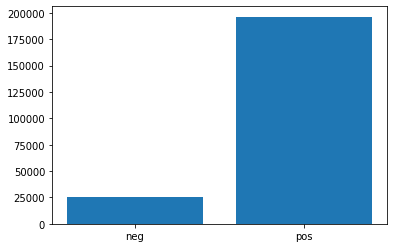

In [32]:
# number of reviews neg or pos
num_neg = len(df_trn_val[df_trn_val[label] == 'neg'])
num_pos = len(df_trn_val[df_trn_val[label] == 'pos'])
num_neg_pos = len(df_trn_val)
pc_neg = round((num_neg/num_neg_pos)*100,2)
pc_pos = round((num_pos/num_neg_pos)*100,2)
print(f'number of neg reviews (rating = 1 or 2): {num_neg} ({pc_neg}%)')
print(f'number of pos reviews (rating = 4 or 5): {num_pos} ({pc_pos}%)')
print(f'number of all reviews: {num_neg_pos}') 

# plot histogram
x= [1,2]
keys = list(df_trn_val[label].value_counts().keys())
values = list(df_trn_val[label].value_counts().array)
plt.bar(x, values[::-1]) 
plt.xticks(x, keys[::-1])
# print(df_trn_val['label'].value_counts())
plt.show()

In [33]:
df_trn_val.to_csv (path_data/'amazon_reviews_filtered_fr.csv', index = None, header=True)

## Get the csv of pre-processed data 

In [9]:
name_data = 'amazon_reviews_fr'
path_data = data_path/name_data

# Load csv
df_trn_val = pd.read_csv(path_data/'amazon_reviews_filtered_fr.csv')

# columns names
reviews = "review_body"
label = "label"

In [10]:
dest = path/'corpus2_100'
(dest/'tmp').ls()

[PosixPath('/home/jupyter/.fastai/data/frwiki/corpus2_100/tmp/spm.model'),
 PosixPath('/home/jupyter/.fastai/data/frwiki/corpus2_100/tmp/spm.vocab')]

In [11]:
df_trn_val.head()

,review_id,review_body,star_rating,label
0,R32VYUWDIB5LKE,je conseille fortement ce bouquin à ceux qui s...,5,pos
1,R3CCMP4EV6HAVL,"ce magnifique est livre , les personnages sont...",5,pos
2,R2E7QEWSC6EWFA,Je l'ai depuis quelques jours et j'en suis trè...,4,pos
3,R26E6I47GQRYKR,"je m'attendait à un bon film, car j'aime beauc...",2,neg
4,R1RJMTSNCKB9LP,Ne disait pas sur l'annonce que c'était un 10'...,2,neg


## Fine-tuning "forward LM"

### Databunch

In [12]:
%%time
data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))

CPU times: user 33.2 s, sys: 1.66 s, total: 34.9 s
Wall time: 57.4 s


In [13]:
data_lm.save(f'{path}/{lang}_databunch_lm_aws_sp15_multifit_v2')

### Training

In [12]:
data_lm = load_data(path, f'{lang}_databunch_lm_aws_sp15_multifit_v2', bs=bs)

In [13]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [14]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3, drop_mult=0.3, 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 4.64 s, sys: 1.5 s, total: 6.14 s
Wall time: 32.3 s


In [15]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


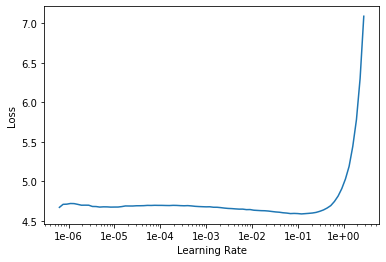

In [16]:
learn_lm.recorder.plot()

In [17]:
lr = 1e-3
lr *= bs/48

wd = 0.01

In [18]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.868189,3.581505,0.672373,0.327627,35.927704,05:29
1,3.737394,3.442246,0.656272,0.343728,31.256992,05:28


In [19]:
learn_lm.save(f'{lang}fine_tuned1_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_sp15_multifit_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.487757,3.317794,0.640384,0.359616,27.599421,07:31
1,3.351605,3.209483,0.625792,0.374207,24.766258,07:31
2,3.257046,3.127676,0.614715,0.385285,22.820894,07:31
3,3.171384,3.077426,0.608249,0.391751,21.702461,07:32
4,3.153673,3.041128,0.603322,0.396678,20.928787,07:32
5,3.086838,3.011693,0.599402,0.400598,20.321775,07:32
6,3.078970,2.989866,0.596276,0.403725,19.883024,07:33
7,3.031662,2.972289,0.593523,0.406477,19.536604,07:32
8,3.000917,2.955677,0.591351,0.408648,19.214760,07:33
9,2.949565,2.941218,0.589300,0.410700,18.938911,07:33


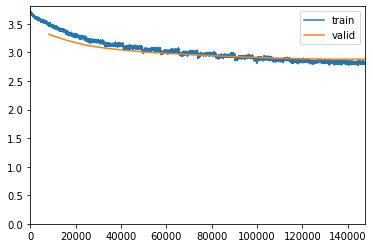

In [20]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [21]:
learn_lm.save(f'{lang}fine_tuned2_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned2_enc_sp15_multifit_v2')

Save best LM learner and its encoder

In [22]:
learn_lm.save(f'{lang}fine_tuned_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_sp15_multifit_v2')

## Fine-tuning "backward LM"

### Databunch

In [12]:
%%time
data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 29.9 s, sys: 1.16 s, total: 31 s
Wall time: 48.9 s


In [13]:
data_lm.save(f'{path}/{lang}_databunch_lm_aws_sp15_multifit_bwd_v2')

### Training

In [12]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_aws_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 1.96 s, sys: 628 ms, total: 2.59 s
Wall time: 4.12 s


In [13]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [14]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3_bwd, drop_mult=0.3, 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 4.3 s, sys: 1.52 s, total: 5.82 s
Wall time: 30.6 s


In [17]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


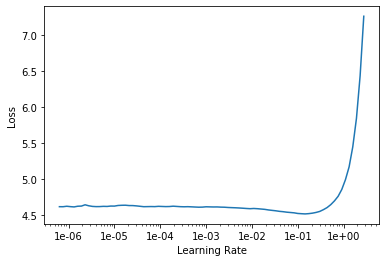

In [18]:
learn_lm.recorder.plot()

In [15]:
lr = 1e-3
lr *= bs/48

wd = 0.01

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.885873,3.570395,0.619722,0.380278,35.530659,05:31
1,3.720925,3.430218,0.604340,0.395660,30.883373,05:31


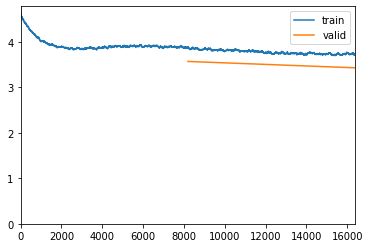

In [32]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [33]:
learn_lm.save(f'{lang}fine_tuned1_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_sp15_multifit_bwd_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.496426,3.315957,0.589387,0.410613,27.548714,07:27
1,3.343582,3.213353,0.576103,0.423897,24.862326,07:26
2,3.248597,3.134908,0.565534,0.434466,22.986530,07:24
3,3.199230,3.085525,0.559169,0.440831,21.878988,07:29
4,3.114331,3.050895,0.554850,0.445150,21.134266,07:29
5,3.118084,3.022557,0.550928,0.449072,20.543736,07:26
6,3.077358,3.001435,0.547984,0.452016,20.114338,07:24
7,3.029807,2.984077,0.545689,0.454311,19.768270,07:24
8,2.978406,2.967431,0.543427,0.456573,19.441893,07:24
9,3.003683,2.951951,0.541148,0.458852,19.143238,07:24


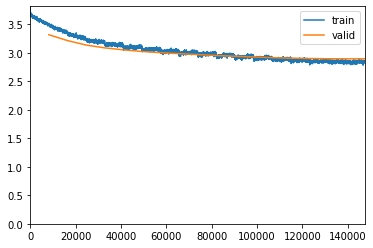

In [16]:
learn_lm.load(f'{lang}fine_tuned1_sp15_multifit_bwd_v2')
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [17]:
learn_lm.save(f'{lang}fine_tuned2_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned2_enc_sp15_multifit_bwd_v2')

Save best LM learner and its encoder

In [18]:
learn_lm.save(f'{lang}fine_tuned_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_sp15_multifit_bwd_v2')

## Fine-tuning "forward Classifier"

In [12]:
bs = 18

### Databunch

In [20]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_aws_sp15_multifit_v2', bs=bs)

CPU times: user 1.8 s, sys: 548 ms, total: 2.34 s
Wall time: 4.86 s


In [21]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1))

CPU times: user 40 s, sys: 1.7 s, total: 41.7 s
Wall time: 1min 5s


In [22]:
%%time
data_clas.save(f'{lang}_textlist_class_sp15_multifit_v2')

CPU times: user 5.04 s, sys: 744 ms, total: 5.78 s
Wall time: 5.28 s


### Get weights to penalize loss function of the majority class

In [13]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 12 s, sys: 884 ms, total: 12.9 s
Wall time: 14.4 s


In [14]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(199311, 22145, 221456)

In [15]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([ 22694, 176617]), array([ 2412, 19733]))

In [16]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.8861377445299056, 0.11386225547009443],
 [0.891081508241138, 0.10891849175886203])

### Training (Loss = FlattenedLoss of weighted CrossEntropyLoss)

In [17]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 12.8 s, sys: 428 ms, total: 13.2 s
Wall time: 12.6 s


In [18]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [19]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, pretrained=False, drop_mult=0.5, 
                                  metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_sp15_multifit_v2');

#### Change loss function

In [20]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [21]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = partial(F.cross_entropy, weight=loss_weights)

In [22]:
learn_c.loss_func

functools.partial(<function cross_entropy at 0x7fc48d052710>, weight=tensor([0.8861, 0.1139], device='cuda:0'))

#### Training

In [23]:
learn_c.freeze()

In [34]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


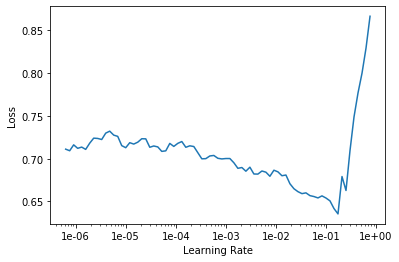

In [35]:
learn_c.recorder.plot()

In [26]:
lr = 2e-2
lr *= bs/48

wd = 0.01

In [37]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.397058,0.264077,0.886385,0.929270,03:50
1,0.382111,0.263587,0.877805,0.923267,04:27


In [38]:
learn_c.save(f'{lang}clas1_sp15_multifit_v2')

In [39]:
learn_c.load(f'{lang}clas1_sp15_multifit_v2');
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.421706,0.264088,0.905306,0.942071,04:47
1,0.400071,0.258678,0.883631,0.927468,04:50


In [40]:
learn_c.save(f'{lang}clas2_sp15_multifit_v2')

In [41]:
learn_c.load(f'{lang}clas2_sp15_multifit_v2');
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.349437,0.222335,0.944592,0.967229,04:12
1,0.328945,0.205256,0.949153,0.969924,04:26


In [42]:
learn_c.save(f'{lang}clas3_sp15_multifit_v2')

In [43]:
learn_c.load(f'{lang}clas3_sp15_multifit_v2');
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.283645,0.219118,0.955882,0.974198,05:24
1,0.264125,0.196374,0.955159,0.973541,06:35


In [44]:
learn_c.save(f'{lang}clas4_sp15_multifit_v2')

In [27]:
learn_c.load(f'{lang}clas4_sp15_multifit_v2');
learn_c.unfreeze()
learn_c.fit_one_cycle(1, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.256820,0.192569,0.955340,0.973631,11:34


In [28]:
learn_c.save(f'{lang}clas5_sp15_multifit_v2')

In [29]:
learn_c.load(f'{lang}clas5_sp15_multifit_v2')
learn_c.save(f'{lang}clas_sp15_multifit_v2')

In [30]:
learn_c.load(f'{lang}clas_sp15_multifit_v2');
learn_c.to_fp32().export(f'{lang}_classifier_sp15_multifit_v2')

### Confusion matrix

In [31]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_sp15_multifit_v2', bs=bs, num_workers=1)

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, pretrained=False, drop_mult=0.5, 
                                  metrics=[accuracy,f1])
# learn_c.load_encoder(f'{lang}fine_tuned_enc_sp15_multifit_v2');

learn_c.load(f'{lang}clas_sp15_multifit_v2');

# put weight on cpu
loss_weights = torch.FloatTensor(trn_weights).cpu()
learn_c.loss_func = partial(F.cross_entropy, weight=loss_weights)

CPU times: user 12.9 s, sys: 796 ms, total: 13.7 s
Wall time: 13 s


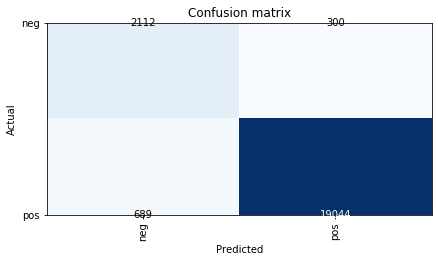

In [32]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
print(f'accuracy global: {(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])}')

# acc neg, acc pos
print(f'accuracy on negative reviews: {cm[0,0]/(cm[0,0]+cm[0,1])*100}') 
print(f'accuracy on positive reviews: {cm[1,1]/(cm[1,0]+cm[1,1])*100}')

[[ 2112   300]
 [  689 19044]]
accuracy global: 0.9553398058252427
accuracy on negative reviews: 87.56218905472637
accuracy on positive reviews: 96.50838696599605


In [34]:
learn_c.show_results()

text,target,prediction
"▁xxbos ▁xxup ▁a vert issement ▁du ▁7 ▁mai ▁2014 ▁: ▁ref ont e ▁de ▁ce ▁comment aire ▁avec ▁3 ▁par a graphe s ▁et ▁ ajout s ▁au ▁xxup ▁monde ▁xxup ▁de ▁xxup ▁la ▁xxup ▁ symphonie , ▁soit ▁une ▁occasion ▁de ▁faire ▁l ' ap ologie ▁de ▁cette ▁forme ▁universelle ▁de ▁la ▁geste ▁symphonique ▁de ▁l ' harmoni a ▁xxmaj ▁mun di ▁! ▁xxmaj ▁parmi ▁les ▁quelques ▁ intégrale",pos,pos
"▁xxbos ▁xxmaj ▁tout ▁comme ▁il ▁l ' avait ▁fait ▁pour ▁la ▁première ▁saison ▁d ' her o es ▁en ▁xxup ▁dvd , ▁xxmaj ▁universal ▁france ▁nous ▁propose ▁un ▁c offre t ▁intégra l ▁de ▁xxmaj ▁ battle star ▁xxmaj ▁gal ac tica ▁encore ▁plus ▁complet ▁que ▁l ' édition ▁américaine , ▁déjà ▁que ▁celle - ci ▁est ▁bour rée ▁à ▁cra quer ▁de ▁bonus , ▁documentaire s ▁et ▁comment aires",pos,pos
"▁xxbos ▁xxmaj ▁cette ▁xxup ▁saga ▁risque ▁de ▁devenir ▁une ▁vit rine ▁c inématographique , ▁si ▁l ' on ▁regard e ▁le ▁nombre ▁et ▁le ▁pan el ▁d ' acteur s ▁connus , ▁qui ▁ont ▁été ▁pré ssent i . ▁xxup ▁un ▁xxup ▁top , ▁xxup ▁la ▁xxup ▁recette ▁xxup ▁: s yl vers ter ▁xxup ▁st allo ne ▁xxup ▁aux ▁xxup ▁commandes , ▁xxup ▁au ▁xxup ▁sens ▁xxup ▁propre ▁xxup",pos,pos
"▁xxbos ▁xxmaj ▁personne ▁n ' imagin ait , ▁et ▁probablement ▁xxmaj ▁ross ini ▁le ▁premier , ▁à ▁la ▁création ▁trio m phal e ▁de ▁xxmaj ▁guillaume ▁xxmaj ▁tel l ▁à ▁xxmaj ▁paris ▁en ▁août ▁1829 , ▁que ▁ce ▁chef ▁d ' œuvre ▁d ' un ▁compositeur ▁de ▁ 37 ▁ans , ▁parvenu ▁au ▁sommet ▁de ▁sa ▁gloire , ▁serait ▁aussi ▁sa ▁dernière ▁œuvre ▁majeure , ▁pré lu dant ▁à ▁un",pos,pos
"▁xxbos ▁xxmaj ▁ attention ▁: ▁cette ▁critique ▁sera ▁con stell ée ▁de ▁gros ▁ s po il ers . ▁xxmaj ▁vous ▁ voi là ▁donc ▁pré ven us ▁que ▁vous ▁continue z ▁cette ▁lecture ▁à ▁vo s ▁risque s ▁et ▁pér ils . ▁xxmaj ▁après ▁avoir ▁ex ami né ▁un ▁peu ▁le ▁film ▁sur ▁la ▁forme , ▁nous ▁analyse ron s ▁le ▁fond ▁en ▁détail , ▁afin ▁de ▁répondre ▁à",neg,neg


### Predictions some random sentences

In [35]:
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

In [36]:
# Get the prediction neg/pos
review = 'Ce produit est bizarre.'
pred = learn_c.predict(review)
print(pred[0], pred[2])

neg tensor([0.9965, 0.0035])


In [37]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
test_text = 'Ce produit est bizarre.'
txt_ci.show_intrinsic_attention(test_text,cmap=cm.Purples)

In [38]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([0.0788, 0.1047, 0.1551, 0.3086, 0.3445, 0.8357, 1.0000, 0.6749, 0.1169],
       device='cuda:0')

In [39]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
"▁xxbos ▁xxmaj ▁si ▁on ▁a ▁ aim é ▁le ▁film , ▁on ▁retrouve ▁toute ▁son ▁ intensité ▁à ▁l ' écoute ▁du ▁xxup ▁cd ▁xxmaj ▁je ▁l ' ai ▁en ▁boucle ▁dans ▁la ▁voiture , ▁je ▁ne ▁m ' en ▁la sse ▁pas",pos,pos,13.37,1.00
"▁xxbos ▁xxmaj ▁en ▁xxmaj ▁europe , ▁il ▁a ▁existé ▁3 ▁montage s ▁ diff e rent s , ▁celui ▁de ▁la ▁sortie ▁en ▁1982 ▁( international ), ▁celui ▁de ▁1992 ▁( dire c tor ' s ▁ cut ) ▁et ▁celui ▁de ▁2007 ▁( fin al ▁ cut ). ▁xxmaj ▁le ▁moins ▁inter re ssant , ▁parce ▁que ▁le ▁plus ▁ aff adi ▁( s up press ion ▁de ▁4",pos,pos,11.64,1.00
▁xxbos ▁xxmaj ▁bonne ▁suite ▁de ▁la ▁saison ▁1 ▁xxmaj ▁ attention ▁ne ▁pas ▁regard er ▁avant ▁16 -17 ▁ans ▁beaucoup ▁de ▁sang ▁et ▁de ▁sexe ▁xxmaj ▁trop ▁peu ▁d ' épisode ▁par ▁saison . ▁xxmaj ▁trop ▁ excellent,pos,pos,8.09,1.00
"▁xxbos ▁xxmaj ▁je ▁trouve ▁ce ▁produit ▁fort ▁cher ▁pour ▁ce ▁que ▁c ' est . ▁xxmaj ▁comme ▁d ' habitude ▁on ▁pay e ▁la ▁pomme . ▁xxmaj ▁ ok ▁le ▁mac book ▁est ▁léger , ▁mais ▁il ▁faut ▁toujours ▁le ▁se t ▁d ' adapt ateurs ▁avec ...",pos,neg,5.85,0.00
"▁xxbos ▁xxmaj ▁un ▁film ▁de ▁toute ▁beauté ▁ , ▁ é mou vant , ▁re la tant ▁une ▁réalité ▁historique ▁xxrep ▁5 ▁! ▁xxmaj ▁une ▁distribution ▁de ▁qualité , ▁film ée ▁d ' une ▁main ▁de ▁maître ▁! ! !",pos,pos,5.75,1.00


## Fine-tuning "backward Classifier"

In [12]:
bs = 18
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

### Databunch

In [13]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_aws_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 2.18 s, sys: 560 ms, total: 2.74 s
Wall time: 4.07 s


In [14]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 49.9 s, sys: 1.75 s, total: 51.6 s
Wall time: 1min 30s


In [15]:
%%time
data_clas.save(f'{lang}_textlist_class_sp15_multifit_bwd_v2')

CPU times: user 6.49 s, sys: 1.02 s, total: 7.51 s
Wall time: 8.75 s


### Get weights to penalize loss function of the majority class

In [13]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 12.4 s, sys: 800 ms, total: 13.2 s
Wall time: 14.9 s


In [14]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(199311, 22145, 221456)

In [15]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([ 22694, 176617]), array([ 2412, 19733]))

In [16]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.8861377445299056, 0.11386225547009443],
 [0.891081508241138, 0.10891849175886203])

### Training (Loss = FlattenedLoss of weighted CrossEntropyLoss)

In [17]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 14.4 s, sys: 684 ms, total: 15.1 s
Wall time: 13.8 s


In [18]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [19]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.5, pretrained=False, 
                                  metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_sp15_multifit_bwd_v2');

#### Change loss function

In [20]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [21]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = partial(F.cross_entropy, weight=loss_weights)

In [22]:
learn_c.loss_func

functools.partial(<function cross_entropy at 0x7f64bf1b0710>, weight=tensor([0.8861, 0.1139], device='cuda:0'))

#### Training

In [23]:
learn_c.freeze()

In [40]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


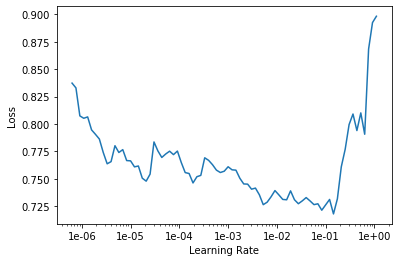

In [41]:
learn_c.recorder.plot()

In [24]:
lr = 2e-2
lr *= bs/48

wd = 0.01

In [44]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.470085,0.305418,0.915873,0.949746,03:55
1,0.442705,0.284821,0.891669,0.932779,04:30


In [45]:
learn_c.save(f'{lang}clas1_sp15_multifit_bwd_v2')

In [46]:
learn_c.load(f'{lang}clas1_sp15_multifit_bwd_v2');
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.367868,0.229045,0.939806,0.964251,04:59
1,0.342452,0.207793,0.943554,0.966407,04:56


In [47]:
learn_c.save(f'{lang}clas2_sp15_multifit_bwd_v2')

In [48]:
learn_c.load(f'{lang}clas2_sp15_multifit_bwd_v2');
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.296243,0.212597,0.949831,0.970389,06:06
1,0.233712,0.185665,0.950056,0.970505,06:55


In [49]:
learn_c.save(f'{lang}clas3_sp15_multifit_bwd_v2')

In [25]:
learn_c.load(f'{lang}clas3_sp15_multifit_bwd_v2');
learn_c.unfreeze()
learn_c.fit_one_cycle(2, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.261080,0.183791,0.946218,0.968110,09:09
1,0.234161,0.177020,0.948295,0.969387,10:26


In [26]:
learn_c.save(f'{lang}clas4_sp15_multifit_bwd_v2')

In [27]:
learn_c.load(f'{lang}clas4_sp15_multifit_bwd_v2');
learn_c.fit_one_cycle(1, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.178675,0.173477,0.943825,0.966685,09:15


In [28]:
learn_c.save(f'{lang}clas5_sp15_multifit_bwd_v2')

In [29]:
learn_c.load(f'{lang}clas5_sp15_multifit_bwd_v2');
learn_c.fit_one_cycle(1, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.223472,0.169082,0.944096,0.966770,11:20


In [30]:
learn_c.save(f'{lang}clas6_sp15_multifit_bwd_v2')

In [31]:
learn_c.load(f'{lang}clas6_sp15_multifit_bwd_v2');
learn_c.fit_one_cycle(1, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.209474,0.168092,0.947302,0.968784,10:37


In [32]:
learn_c.save(f'{lang}clas7_sp15_multifit_bwd_v2')

In [35]:
learn_c.load(f'{lang}clas7_sp15_multifit_bwd_v2');
learn_c.fit_one_cycle(1, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.174563,0.167442,0.947934,0.969169,10:26


In [36]:
learn_c.save(f'{lang}clas8_sp15_multifit_bwd_v2')

In [45]:
learn_c.load(f'{lang}clas8_sp15_multifit_bwd_v2')
learn_c.save(f'{lang}clas_sp15_multifit_bwd_v2')

In [46]:
learn_c.load(f'{lang}clas_sp15_multifit_bwd_v2');
learn_c.to_fp32().export(f'{lang}_classifier_sp15_multifit_bwd_v2')

### Confusion matrix

In [47]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.5, pretrained=False,
                                  metrics=[accuracy,f1])
# learn_c.load_encoder(f'{lang}fine_tuned_enc_sp15_multifit_bwd_v2');

learn_c.load(f'{lang}clas_sp15_multifit_bwd_v2');

# put weight on cpu
loss_weights = torch.FloatTensor(trn_weights).cpu()
learn_c.loss_func = partial(F.cross_entropy, weight=loss_weights)

CPU times: user 13.9 s, sys: 1.09 s, total: 15 s
Wall time: 14.2 s


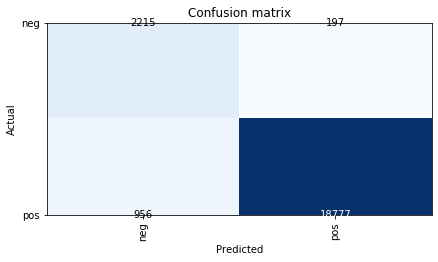

In [48]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
print(f'accuracy global: {(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])}')

# acc neg, acc pos
print(f'accuracy on negative reviews: {cm[0,0]/(cm[0,0]+cm[0,1])*100}') 
print(f'accuracy on positive reviews: {cm[1,1]/(cm[1,0]+cm[1,1])*100}')

[[ 2215   197]
 [  956 18777]]
accuracy global: 0.9479340708963648
accuracy on negative reviews: 91.83250414593698
accuracy on positive reviews: 95.1553235696549


In [50]:
learn_c.show_results()

text,target,prediction
. s ▁remarque ▁xxup ▁dans ▁continue aire ▁comment ▁le ▁xxmaj ] ] le agi ▁ ▁xxmaj ro est ▁ma ▁xxmaj xx 6 l ▁6 ▁xxup ▁0 ▁4 ▁xxrep b : in as [ ▁[ ▁xxup ] ] ▁2 . ▁vol ▁collection ▁xxmaj icht ur ▁sch ▁xxmaj ▁carl ▁xxmaj k tak 25 9 00 b : in as [ ▁[ ▁xxup ] ] ] ▁dvd ▁xxup ▁1 ▁/ s ▁cd 20,pos,pos
". g s ▁b ▁xxup ▁de ▁fan ▁tout ▁pour ▁posséder ▁à t offre ▁c ▁un ▁xxmaj ) f v ▁( ▁xxup ol contr - u ▁ ▁bonus ▁le ▁dans ▁disponibles ▁informations ▁des intégralité ▁ ▁: ▁"" \ ▁ cle ora ' l ▁"" \ ▁ ) f v ▁( ▁xxup nage ▁vision ▁de ▁cours ▁en ▁vaisseaux ▁les ▁et ▁personnages ▁les ▁sur ▁informations ▁: ▁"" \ ▁ cle ora ' l",pos,pos
". tor ▁termina ▁xxmaj ▁en gger e en arz ▁schw ▁xxmaj ▁arnold ▁xxmaj aperçoit ▁ ▁on ▁fin ▁de ▁générique ▁au ▁xxmaj . ▁jones ▁xxmaj indiana ▁ ▁xxmaj ▁à ▁référence ▁fait ▁xxmaj ▁: ▁film ▁du ▁fin ▁la ▁à "") ▁ \ ▁ ▁musée ▁un ▁dans ▁est ▁place sa ▁"" \ ▁ ▁( ▁"" \ ▁ ▁museum ▁a ▁in s ong ▁bel thing ▁ at th ▁"" \ ▁ ). ton mou",pos,pos
"... ▁semaines ▁quelques ▁dans ni van gio ▁bon ▁xxmaj ▁chez ▁paraît ▁qui ] ] l ▁tel ▁xxmaj ▁guillaume ▁xxmaj 8 f 45 89 v 00 b : in as [ ▁[ ▁xxup ani gli ▁fo ▁xxmaj ▁/ ber le ön sh ▁ ▁xxmaj ▁version ▁la ▁de ▁dvd ▁xxup ▁le ▁avec r ▁compare ▁la ▁de nant ▁passion ▁être ▁va ▁il ▁xxmaj . ▁vidéo ▁que ▁audio ▁tant , ographie ▁disc ce ▁min",pos,pos
". ▁disney ▁xxmaj ▁vieux s ▁bon ▁aux ▁restera ▁en ▁on ▁bien ▁ou , ] ] s ▁géant ▁de ▁chasseur ▁le ▁jack ▁xxmaj 18 t h 76 c 00 b : in as [ ▁[ ▁xxup mé i est s ▁mé ▁et ▁bon ▁très ▁le , ▁exemple ▁par , ra re fé ▁pré ▁leur ▁on , ▁veine ▁même ▁la ▁dans ▁xxmaj . ▁spectacle ▁ce ▁devant ▁enfants ▁des ▁mettre ▁de a ▁éviter",neg,pos


### Predictions some random sentences

In [51]:
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

In [52]:
# Get the prediction neg/pos
review = 'Ce produit est bizarre.'
pred = learn_c.predict(review)
print(pred[0], pred[2])

neg tensor([0.9984, 0.0016])


In [53]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
test_text = 'Ce produit est bizarre.'
txt_ci.show_intrinsic_attention(test_text,cmap=cm.Purples)

In [54]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([0.2897, 0.6939, 1.0000, 0.6681, 0.1437, 0.2126, 0.1160, 0.0454, 0.0124],
       device='cuda:0')

In [55]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
▁xxbos ▁xxmaj ▁bonne ▁suite ▁de ▁la ▁saison ▁1 ▁xxmaj ▁ attention ▁ne ▁pas ▁regard er ▁avant ▁16 -17 ▁ans ▁beaucoup ▁de ▁sang ▁et ▁de ▁sexe ▁xxmaj ▁trop ▁peu ▁d ' épisode ▁par ▁saison . ▁xxmaj ▁trop ▁ excellent,pos,pos,9.98,1.00
"▁xxbos ▁xxmaj ▁très ▁bonne ▁adaptation ▁du ▁personnage . ▁xxmaj ▁le ▁fait ▁de ▁place r ▁les ▁ intrigue s ▁à ▁notre ▁époque ▁rend ▁les ▁personnages ▁plus ▁ abord ables ▁et ▁ atta chant s . ▁xxmaj ▁nous ▁assis ton s ▁à ▁la ▁rencontre ▁de ▁xxmaj ▁ holm es ▁et ▁xxmaj ▁watson , ▁et ▁la ▁aussi , ▁c ' est ▁une ▁très ▁bonne ▁ idée . ▁xxmaj ▁chaque ▁histoire ▁est ▁bien ▁fi",pos,pos,6.88,1.00
"▁xxbos ▁xxmaj ▁en ▁xxmaj ▁europe , ▁il ▁a ▁existé ▁3 ▁montage s ▁ diff e rent s , ▁celui ▁de ▁la ▁sortie ▁en ▁1982 ▁( international ), ▁celui ▁de ▁1992 ▁( dire c tor ' s ▁ cut ) ▁et ▁celui ▁de ▁2007 ▁( fin al ▁ cut ). ▁xxmaj ▁le ▁moins ▁inter re ssant , ▁parce ▁que ▁le ▁plus ▁ aff adi ▁( s up press ion ▁de ▁4",pos,pos,6.61,1.00
"▁xxbos ▁xxmaj ▁le ▁plus ▁abouti ▁de ▁tous ▁les ▁albums ▁de ▁xxmaj ▁ kate ▁xxmaj ▁bush . ▁xxmaj ▁le ▁plus ▁magique . ▁xxmaj ▁elle ▁y ▁a ▁mis ▁toute ▁son ▁en er gie , ▁toute ▁sa ▁créa t ivité ▁et ▁sa ▁per son alité . ▁xxmaj ▁un ▁voyage ▁parmi ▁les ▁thèmes ▁du ▁savoir , ▁des ▁cultures , ▁des ▁croyance s , ▁de ▁l ' horreur , ▁de ▁la ▁peur , ▁du ▁doute",pos,pos,5.87,1.00
"▁xxbos ▁xxmaj ▁je ▁trouve ▁ce ▁produit ▁fort ▁cher ▁pour ▁ce ▁que ▁c ' est . ▁xxmaj ▁comme ▁d ' habitude ▁on ▁pay e ▁la ▁pomme . ▁xxmaj ▁ ok ▁le ▁mac book ▁est ▁léger , ▁mais ▁il ▁faut ▁toujours ▁le ▁se t ▁d ' adapt ateurs ▁avec ...",pos,neg,5.31,0.00


## Ensemble

In [56]:
bs = 18

In [57]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [58]:
data_clas = load_data(path, f'{lang}_textlist_class_sp15_multifit_v2', bs=bs, num_workers=1)
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.5, metrics=[accuracy,f1]).to_fp16()
learn_c.load(f'{lang}clas_sp15_multifit_v2', purge=False);

In [59]:
preds,targs = learn_c.get_preds(ordered=True)
accuracy(preds,targs),f1(preds,targs)

(tensor(0.9553), tensor(0.9747))

In [60]:
data_clas_bwd = load_data(path, f'{lang}_textlist_class_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)
learn_c_bwd = text_classifier_learner(data_clas_bwd, AWD_LSTM, config=config, drop_mult=0.5, metrics=[accuracy,f1]).to_fp16()
learn_c_bwd.load(f'{lang}clas_sp15_multifit_bwd_v2', purge=False);

In [61]:
preds_b,targs_b = learn_c_bwd.get_preds(ordered=True)
accuracy(preds_b,targs_b),f1(preds_b,targs_b)

(tensor(0.9478), tensor(0.9702))

In [62]:
preds_avg = (preds+preds_b)/2

In [63]:
accuracy(preds_avg,targs_b),f1(preds_avg,targs_b)

(tensor(0.9574), tensor(0.9758))

In [64]:
from sklearn.metrics import confusion_matrix

predictions = np.argmax(preds_avg, axis = 1)
cm = confusion_matrix(np.array(targs_b), np.array(predictions))
print(cm)

## acc
print(f'accuracy global: {(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])}')

# acc neg, acc pos
print(f'accuracy on negative reviews: {cm[0,0]/(cm[0,0]+cm[0,1])*100}') 
print(f'accuracy on positive reviews: {cm[1,1]/(cm[1,0]+cm[1,1])*100}')

[[ 2186   226]
 [  717 19016]]
accuracy global: 0.9574170241589524
accuracy on negative reviews: 90.6301824212272
accuracy on positive reviews: 96.36649267724117
